In [1]:
import pyedflib #pip install pyEDFlib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#pip install connectivipy
import connectivipy as cp
import pandas as pd

In [2]:
def import_data(filename):
    f = pyedflib.EdfReader(filename)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    signal_labels = [sl.replace('.','') for sl in signal_labels]
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    return sigbufs, signal_labels

In [3]:
eyes_open, olabels = import_data('D:/DataScience/BI/HW03/S059R01.edf')
eyes_closed, clabels  = import_data('D:/DataScience/BI/HW03/S059R02.edf')

In [4]:
#Akaike criterion of MVAR order estimation
po = cp.Mvar.order_akaike(eyes_open)[0]
pc = cp.Mvar.order_akaike(eyes_closed)[0]
print('eyes open order:',po)
print('eyes closed order:',po)

eyes open order: 5
eyes closed order: 5


In [5]:
#Mvar model fitting
Ao, Vo = cp.Mvar.fit(data=eyes_open, order=po, method='yw')
Ac, Vc = cp.Mvar.fit(data=eyes_closed, order=pc, method='yw')

# 2.1. (mandatory) Estimate functional brain connectivity among 64 channels using one of the MVAR estimators: Partial Directed Coherence (PDC), Direct Transfer Function (DTF). Select one relevant frequency value. Apply a threshold so that the resulting binary connectivity matrices have network density equal to 20%. Create a graphical representation of the binary adjacency matrix.

# PDC

In [6]:
fs = 160
resolution = 80
o_pdc = cp.conn.pdc_fun(Ao, Vo, fs, resolution)
c_pdc = cp.conn.pdc_fun(Ac, Vc, fs, resolution)

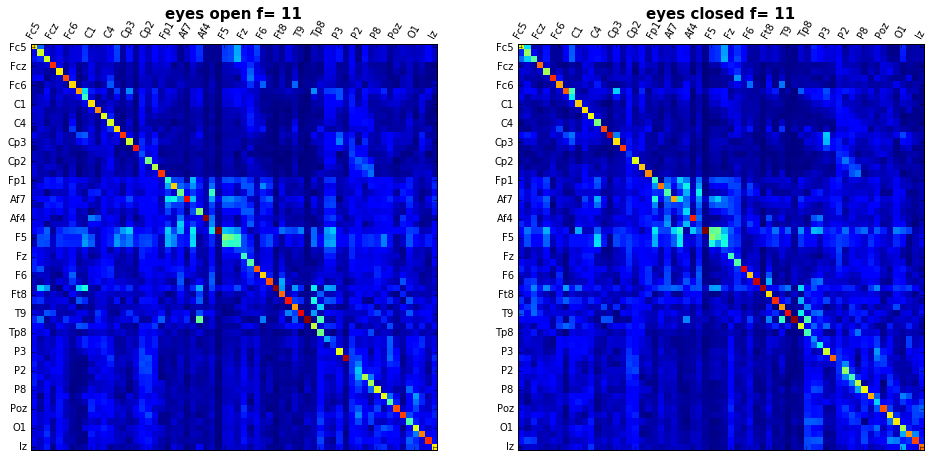

In [7]:
freq = 11
n = list(np.arange(0,64,3))
l = [olabels[i] for i in n]

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(10)
f.set_figwidth(16)

ax1.matshow(o_pdc[freq])
ax1.set_title('eyes open f= '+str(freq), fontsize=15, fontweight='bold')
ax1.set_xticks(n)
ax1.set_yticks(n)
ax1.set_xticklabels(l)
ax1.set_yticklabels(l)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

ax2.matshow(c_pdc[freq])
ax2.set_title('eyes closed f= '+str(freq), fontsize=15, fontweight='bold')
ax2.set_xticks(n)
ax2.set_yticks(n)
ax2.set_xticklabels(l)
ax2.set_yticklabels(l)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=60)
plt.setp(ax2.yaxis.get_majorticklabels(), rotation=0)

plt.show()

# Apply a threshold so that the resulting binary connectivity matrices have network density equal to 20%.

In [8]:
def adjacency_matrix(M,freq=11,d=0.2):
    nnodes = M.shape[1]
    np.fill_diagonal(M[freq],0)
    threshold = 0

    for t in np.arange(0,1,0.001):
        nedges = np.sum(M[freq]>t)
        density = nedges/((nnodes)*(nnodes-1))
        if round(density,2)==d:
            print(t, density)
            threshold = t
            break
    return (M[freq]>threshold)+0

In [9]:
Ao_pdc = adjacency_matrix(o_pdc,11,0.2)
Ac_pdc = adjacency_matrix(c_pdc,11,0.2)

0.115 0.201388888889
0.115 0.202132936508


### eyes open

In [10]:
nc = (.5,.72,.8,1)

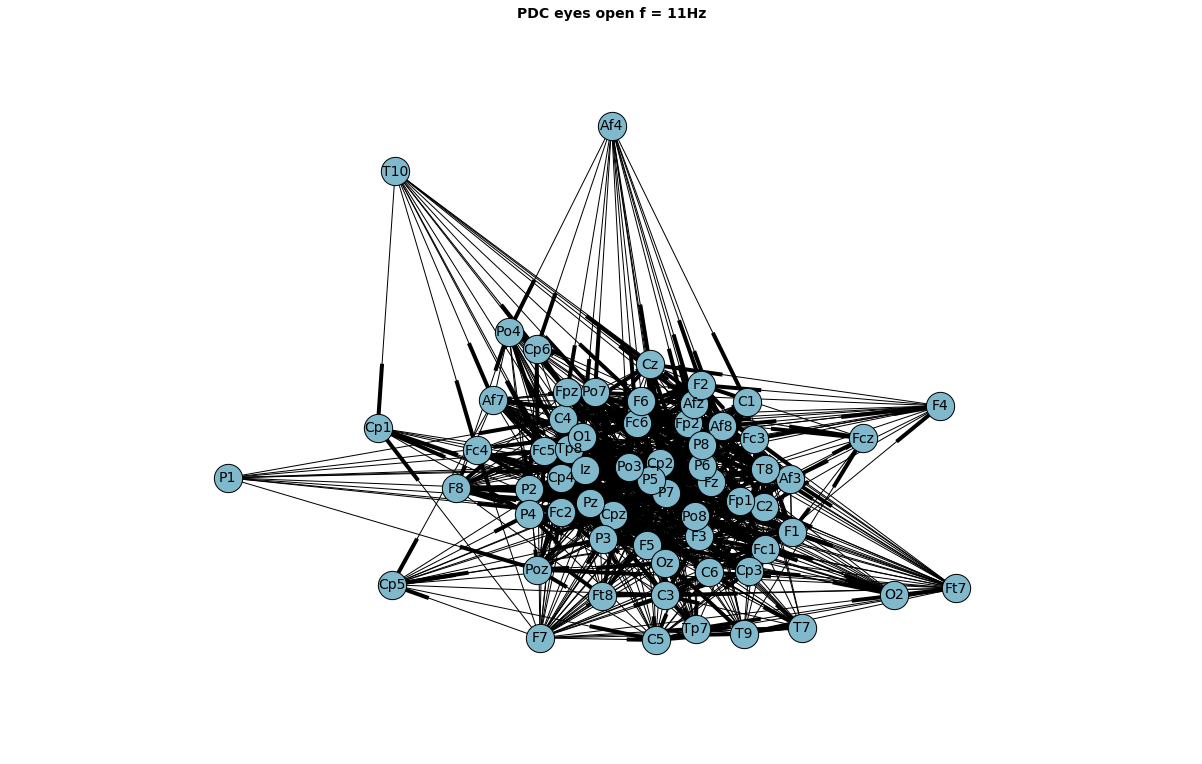

In [11]:
plt.figure(figsize=(16, 10))
G_pdc_o = nx.from_numpy_matrix(Ao_pdc, create_using=nx.DiGraph())
pos = nx.spring_layout(G_pdc_o)
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(G_pdc_o, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G_pdc_o, pos, labels, font_size=14)
plt.title('PDC eyes open f = '+str(freq)+'Hz', fontsize=14, fontweight='bold')
plt.show()
np.savetxt('D:/DataScience/BI/HW03/Ao_pdc.txt', Ao_pdc)

In [12]:
nx.density(G_pdc_o)

0.2013888888888889

### eyes closed

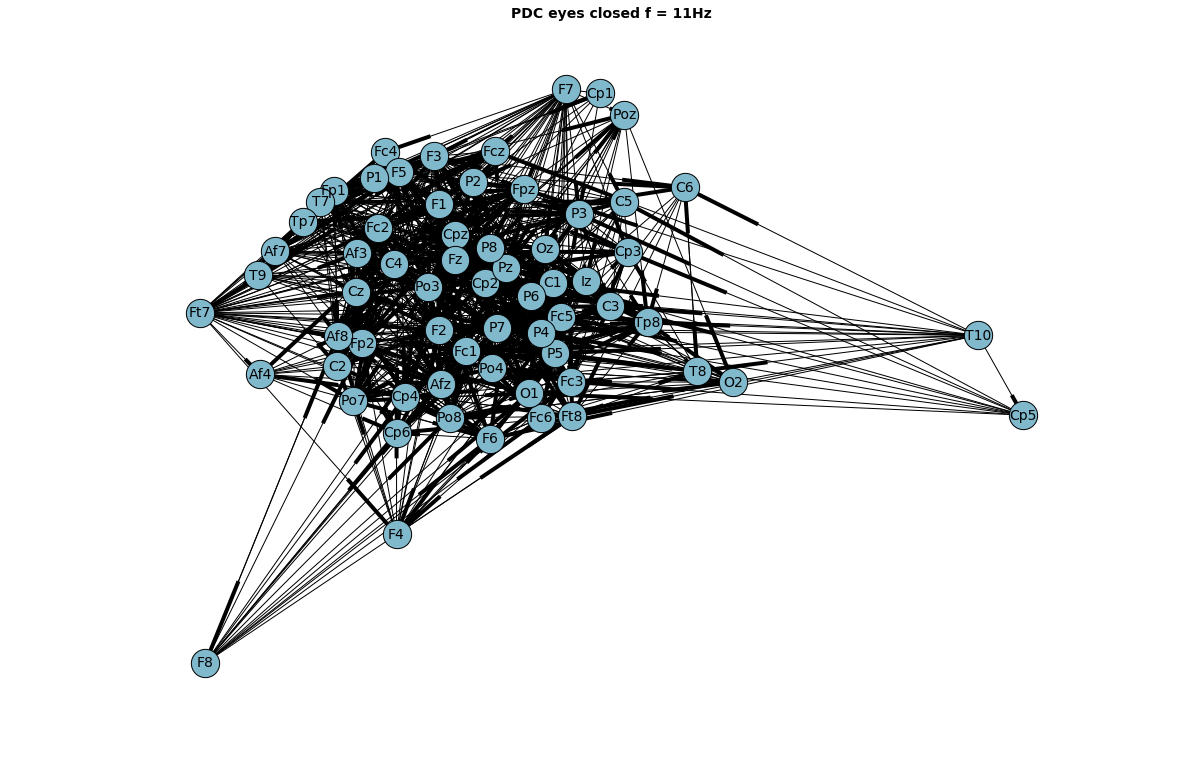

In [13]:
plt.figure(figsize=(16, 10))
G_pdc_c = nx.from_numpy_matrix(Ac_pdc, create_using=nx.DiGraph())
pos = nx.spring_layout(G_pdc_c)
labels = {i: clabels[i] for i in range(len(clabels))}
nx.draw(G_pdc_c, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G_pdc_c, pos, labels, font_size=14)
plt.title('PDC eyes closed f = '+str(freq)+'Hz', fontsize=14, fontweight='bold')
plt.show()
np.savetxt('D:/DataScience/BI/HW03/Ac_pdc.txt', Ac_pdc)

In [14]:
nx.density(G_pdc_c)

0.2021329365079365

# 2.2. (class ‘A’) Perform task 2.1 using both estimators (PDC and DTF).

# DTF

In [15]:
o_dtf = cp.conn.dtf_fun(Ao, Vo, fs, resolution)
c_dtf = cp.conn.dtf_fun(Ac, Vc, fs, resolution)

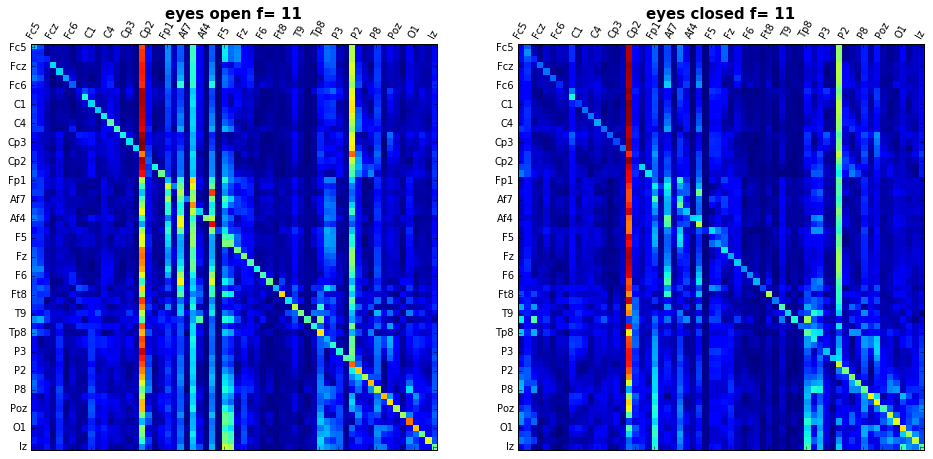

In [16]:
freq = 11
n = list(np.arange(0,64,3))
l = [olabels[i] for i in n]

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(10)
f.set_figwidth(16)

ax1.matshow(o_dtf[freq])
ax1.set_title('eyes open f= '+str(freq), fontsize=15, fontweight='bold')
ax1.set_xticks(n)
ax1.set_yticks(n)
ax1.set_xticklabels(l)
ax1.set_yticklabels(l)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

ax2.matshow(c_dtf[freq])
ax2.set_title('eyes closed f= '+str(freq), fontsize=15, fontweight='bold')
ax2.set_xticks(n)
ax2.set_yticks(n)
ax2.set_xticklabels(l)
ax2.set_yticklabels(l)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=60)
plt.setp(ax2.yaxis.get_majorticklabels(), rotation=0)

plt.show()

In [17]:
Ao_dtf = adjacency_matrix(o_dtf,11,0.2)
Ac_dtf = adjacency_matrix(c_dtf,11,0.2)

0.113 0.203373015873
0.101 0.204365079365


### eyes open

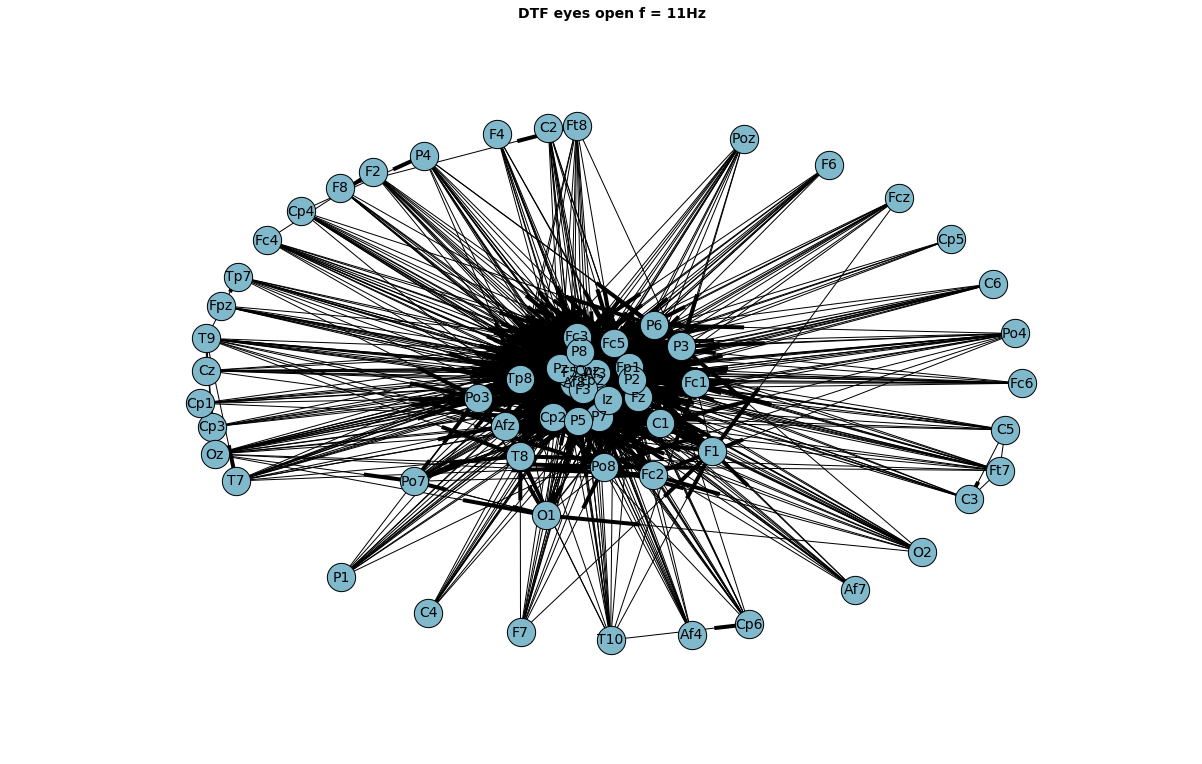

In [18]:
plt.figure(figsize=(16, 10))
G_dtf_o = nx.from_numpy_matrix(Ao_dtf, create_using=nx.DiGraph())
pos = nx.spring_layout(G_dtf_o)
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(G_dtf_o, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G_dtf_o, pos, labels, font_size=14)
plt.title('DTF eyes open f = '+str(freq)+'Hz', fontsize=14, fontweight='bold')
plt.show()
np.savetxt('D:/DataScience/BI/HW03/Ao_dtf.txt', Ao_dtf)

In [19]:
nx.density(G_dtf_o)

0.20337301587301587

### eyes closed

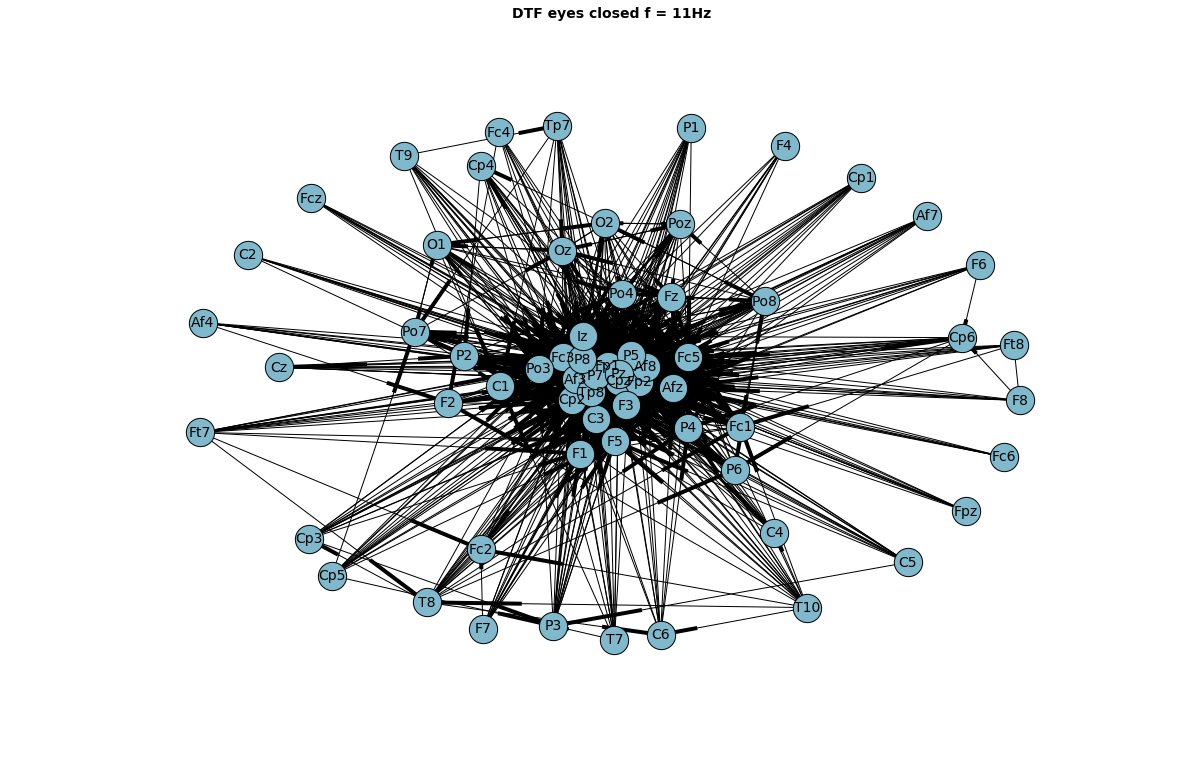

In [20]:
plt.figure(figsize=(16, 10))
G_dtf_c = nx.from_numpy_matrix(Ac_dtf, create_using=nx.DiGraph())
pos = nx.spring_layout(G_dtf_c)
labels = {i: clabels[i] for i in range(len(clabels))}
nx.draw(G_dtf_c, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G_dtf_c, pos, labels, font_size=14)
plt.title('DTF eyes closed f = '+str(freq)+'Hz', fontsize=14, fontweight='bold')
plt.show()
np.savetxt('D:/DataScience/BI/HW03/Ac_dtf.txt', Ac_dtf)

In [21]:
nx.density(G_dtf_c)

0.20436507936507936

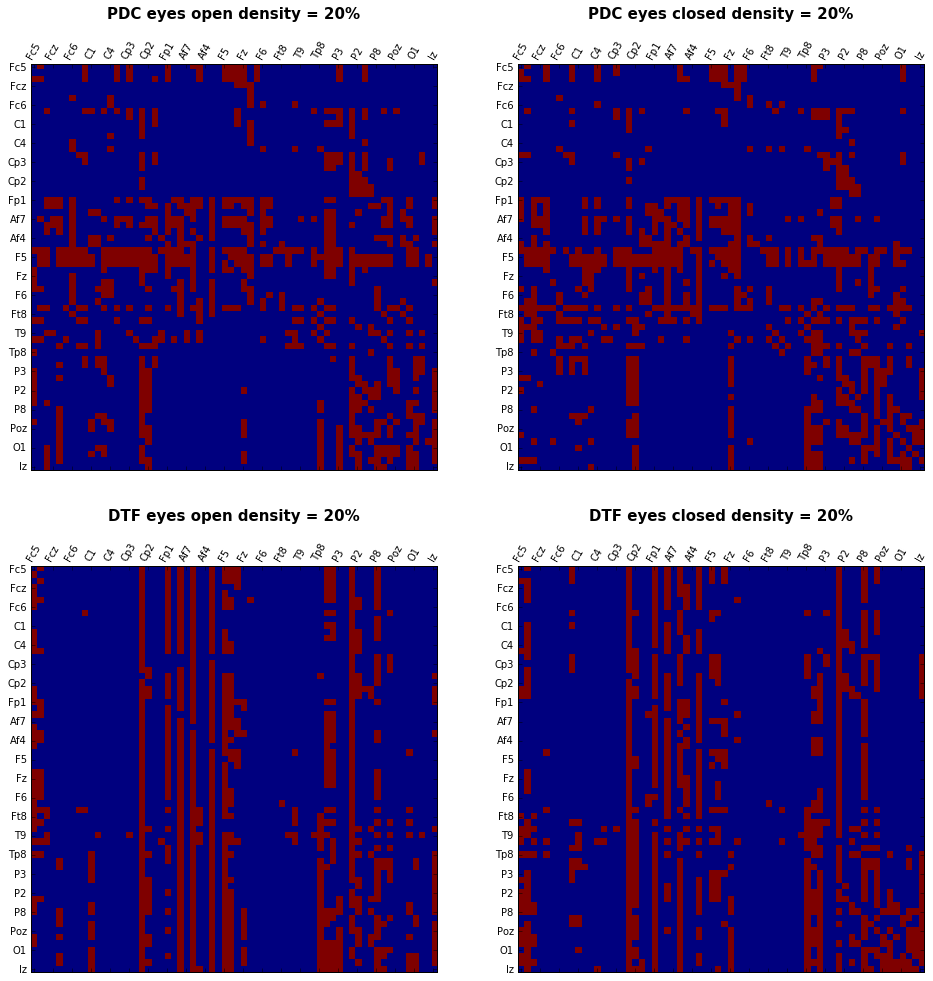

In [22]:
n = list(np.arange(0,64,3))
l = [olabels[i] for i in n]

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0)
f.set_figheight(18)
f.set_figwidth(16)

ax1.matshow(Ao_pdc)
ax1.set_title('PDC eyes open density = 20%', fontsize=15, fontweight='bold', y = 1.1)
ax1.set_xticks(n)
ax1.set_yticks(n)
ax1.set_xticklabels(l)
ax1.set_yticklabels(l)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

ax2.matshow(Ac_pdc)
ax2.set_title('PDC eyes closed density = 20%', fontsize=15, fontweight='bold', y = 1.1)
ax2.set_xticks(n)
ax2.set_yticks(n)
ax2.set_xticklabels(l)
ax2.set_yticklabels(l)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=60)
plt.setp(ax2.yaxis.get_majorticklabels(), rotation=0)

ax3.matshow(Ao_dtf)
ax3.set_title('DTF eyes open density = 20%', fontsize=15, fontweight='bold', y = 1.1)
ax3.set_xticks(n)
ax3.set_yticks(n)
ax3.set_xticklabels(l)
ax3.set_yticklabels(l)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=60)
plt.setp(ax3.yaxis.get_majorticklabels(), rotation=0)

ax4.matshow(Ac_dtf)
ax4.set_title('DTF eyes closed density = 20%', fontsize=15, fontweight='bold', y = 1.1)
ax4.set_xticks(n)
ax4.set_yticks(n)
ax4.set_xticklabels(l)
ax4.set_yticklabels(l)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=60)
plt.setp(ax4.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('D:/DataScience/BI/HW03/2.2-PDC_DTF20.eps')
plt.savefig('D:/DataScience/BI/HW03/2.2-PDC_DTF20.png') 
plt.show()

# 2.3. (class ‘A’) Perform task 2.1 using thresholds yielding the following density values: 1%, 5%, 10%, 20%, 30%, 50%.

# PDC

### eyes open

0.255 0.0146329365079
0.182 0.0535714285714
0.147 0.104166666667
0.115 0.201388888889
0.092 0.304067460317
0.061 0.501488095238


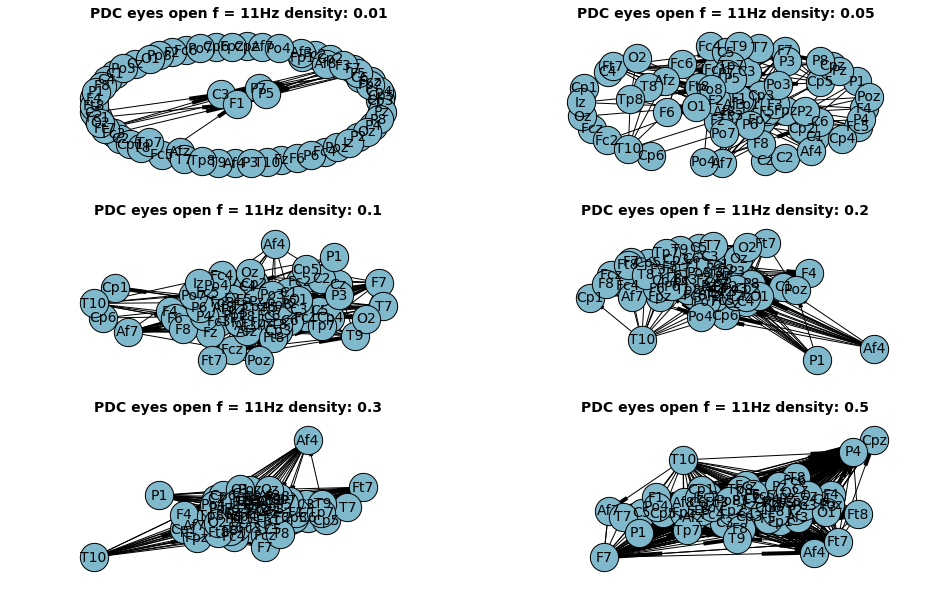

In [23]:
plt.figure(figsize=(16, 10))

d = [0.01,0.05,0.1,0.2,0.3,0.5]
idx = 0
As = []

for density in d:
    idx += 1
    plt.subplot(320+idx)
    A = adjacency_matrix(o_pdc,freq,density)
    As += [A]
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
    pos = nx.spring_layout(G)
    labels = {i: olabels[i] for i in range(len(olabels))}
    nx.draw(G, pos, node_size = 800, node_color = nc)
    nx.draw_networkx_labels(G, pos, labels, font_size=14)
    plt.title('PDC eyes open f = '+str(freq)+'Hz density: '+str(density), fontsize=14, fontweight='bold')

plt.show()

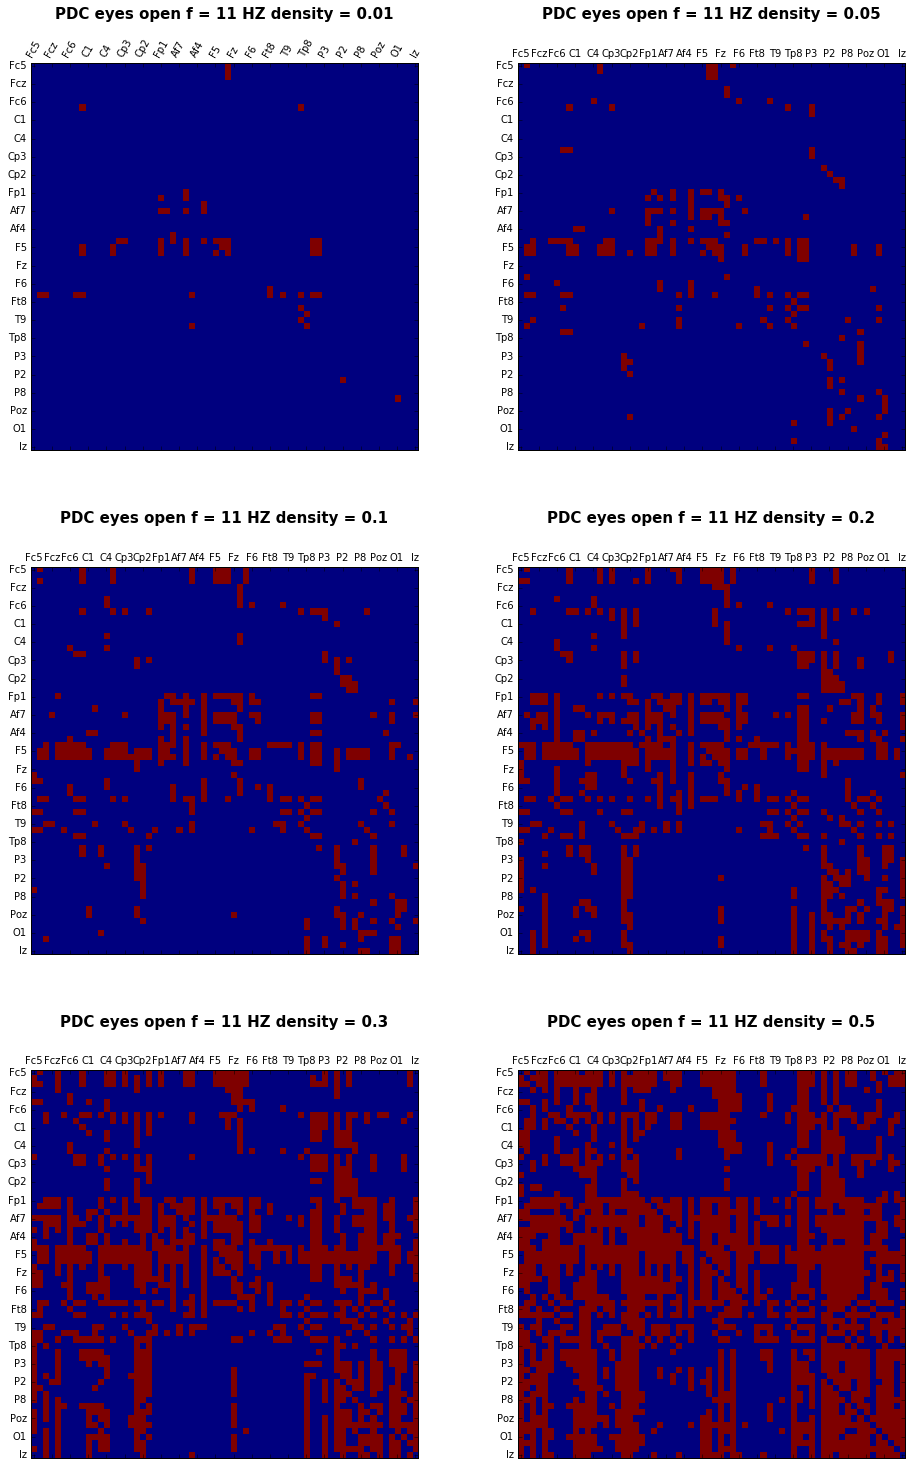

In [24]:
n = list(np.arange(0,64,3))
l = [olabels[i] for i in n]

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]
plt.subplots_adjust(hspace=.3)
f.set_figheight(25)
f.set_figwidth(16)

for i in range(6):
    axs[i].matshow(As[i])
    axs[i].set_title('PDC eyes open f = 11 HZ density = '+str(d[i]), fontsize=15, fontweight='bold', y = 1.1)
    axs[i].set_xticks(n)
    axs[i].set_yticks(n)
    axs[i].set_xticklabels(l)
    axs[i].set_yticklabels(l)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
    plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('D:/DataScience/BI/HW03/2.3-PDC(eyes_open)_freqs.png') 
plt.show()

### eyes closed

0.257 0.014880952381
0.182 0.0535714285714
0.147 0.104166666667
0.115 0.202132936508
0.09 0.302827380952
0.061 0.499007936508


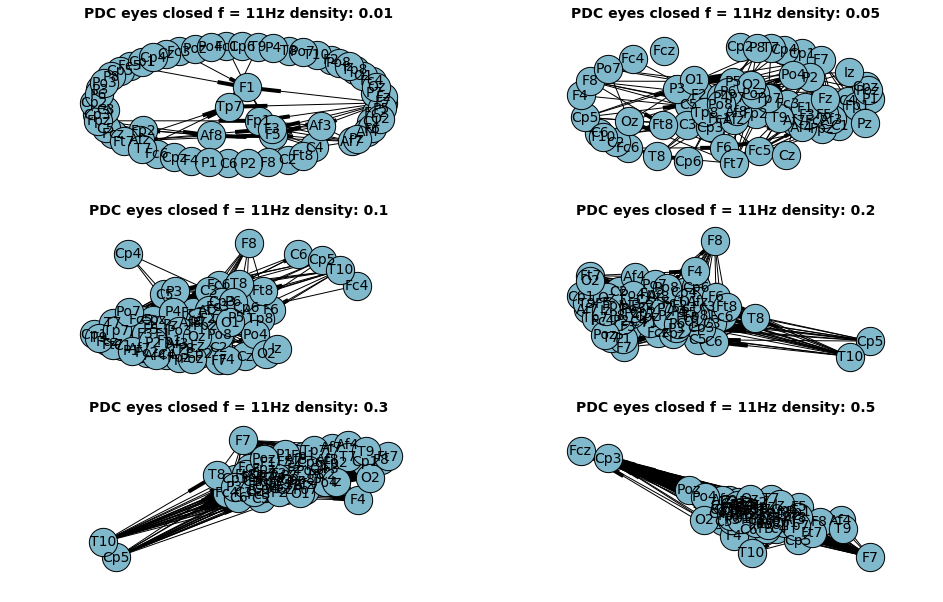

In [25]:
plt.figure(figsize=(16, 10))

d = [0.01,0.05,0.1,0.2,0.3,0.5]
idx = 0
As = []
for density in d:
    idx += 1
    plt.subplot(320+idx)
    A = adjacency_matrix(c_pdc,freq,density)
    As += [A]
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
    pos = nx.spring_layout(G)
    labels = {i: clabels[i] for i in range(len(clabels))}
    nx.draw(G, pos, node_size = 800, node_color = nc)
    nx.draw_networkx_labels(G, pos, labels, font_size=14)
    plt.title('PDC eyes closed f = '+str(freq)+'Hz density: '+str(density), fontsize=14, fontweight='bold')

plt.show()

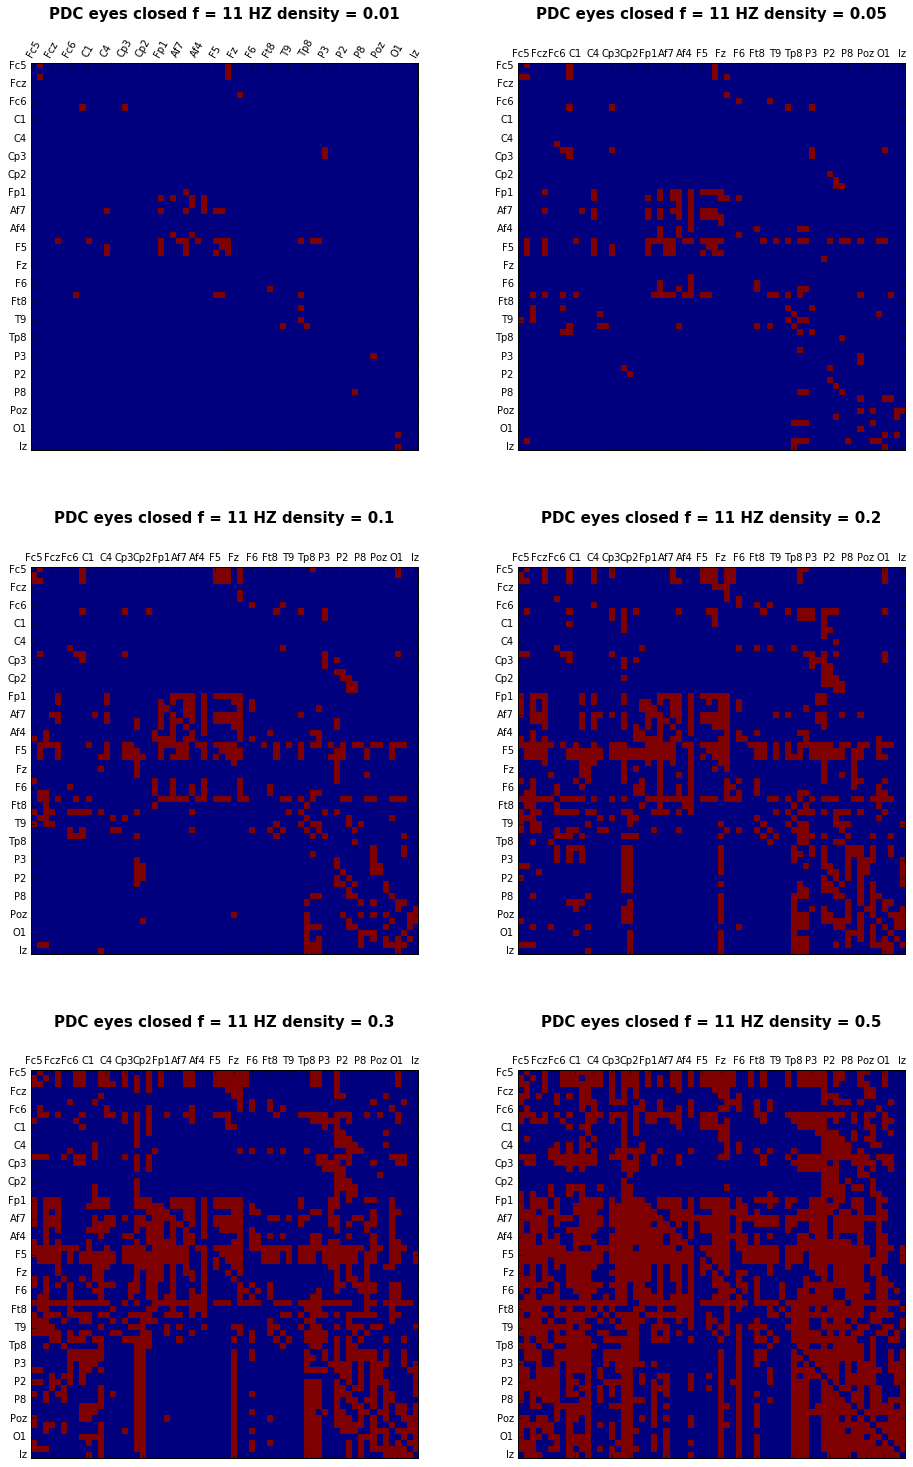

In [26]:
n = list(np.arange(0,64,3))
l = [olabels[i] for i in n]

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]
plt.subplots_adjust(hspace=.3)
f.set_figheight(25)
f.set_figwidth(16)

for i in range(6):
    axs[i].matshow(As[i])
    axs[i].set_title('PDC eyes closed f = 11 HZ density = '+str(d[i]), fontsize=15, fontweight='bold', y = 1.1)
    axs[i].set_xticks(n)
    axs[i].set_yticks(n)
    axs[i].set_xticklabels(l)
    axs[i].set_yticklabels(l)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
    plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('D:/DataScience/BI/HW03/2.3-PDC(eyes_closed)_freqs.png') 
plt.show()

# DTC

### eyes open

0.424 0.014880952381
0.232 0.0545634920635
0.164 0.103918650794
0.113 0.203373015873
0.083 0.301339285714
0.047 0.495535714286


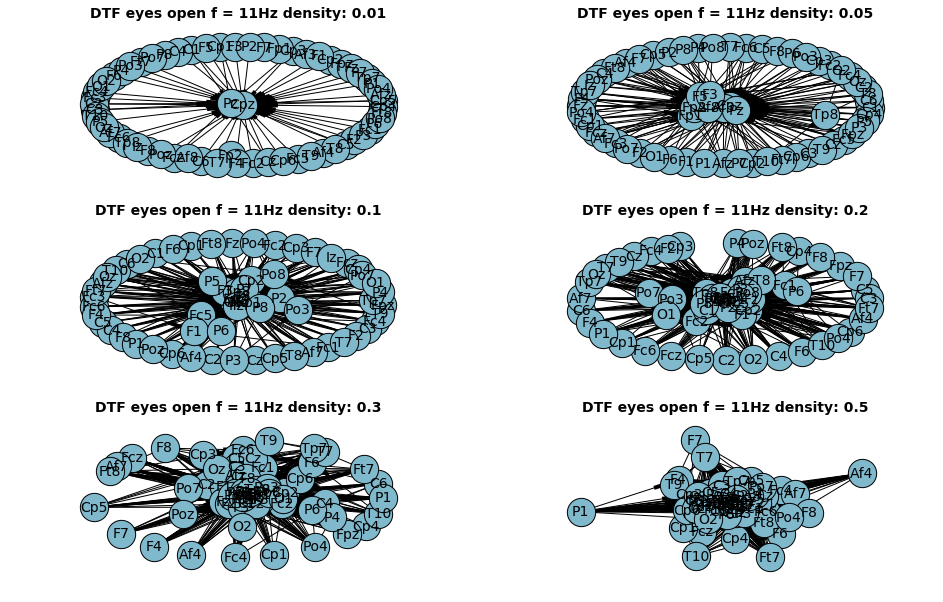

In [27]:
plt.figure(figsize=(16, 10))

d = [0.01,0.05,0.1,0.2,0.3,0.5]
idx = 0
As = []

for density in d:
    idx += 1
    plt.subplot(320+idx)
    A = adjacency_matrix(o_dtf,freq,density)
    As += [A]
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
    pos = nx.spring_layout(G)
    labels = {i: olabels[i] for i in range(len(olabels))}
    nx.draw(G, pos, node_size = 800, node_color = nc)
    nx.draw_networkx_labels(G, pos, labels, font_size=14)
    plt.title('DTF eyes open f = '+str(freq)+'Hz density: '+str(density), fontsize=14, fontweight='bold')

plt.show()

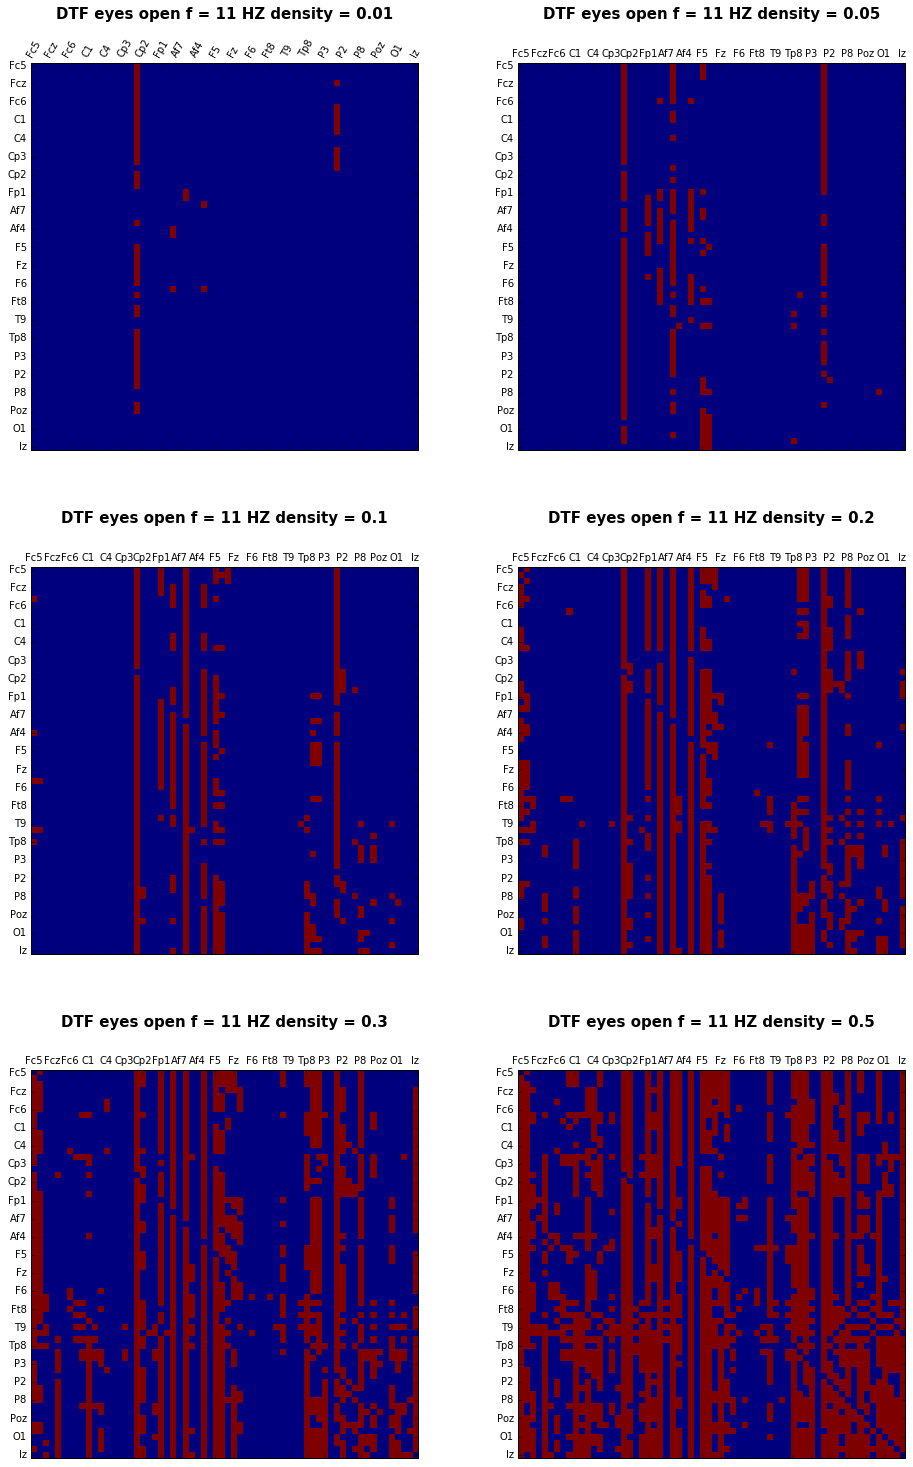

In [28]:
n = list(np.arange(0,64,3))
l = [olabels[i] for i in n]

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]
plt.subplots_adjust(hspace=.3)
f.set_figheight(25)
f.set_figwidth(16)

for i in range(6):
    axs[i].matshow(As[i])
    axs[i].set_title('DTF eyes open f = 11 HZ density = '+str(d[i]), fontsize=15, fontweight='bold', y = 1.1)
    axs[i].set_xticks(n)
    axs[i].set_yticks(n)
    axs[i].set_xticklabels(l)
    axs[i].set_yticklabels(l)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
    plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('D:/DataScience/BI/HW03/2.3-DTF(eyes_open)_freqs.png') 
plt.show()

### eyes closed

0.419 0.014880952381
0.207 0.0543154761905
0.148 0.104166666667
0.101 0.204365079365
0.079 0.299603174603
0.051 0.500248015873


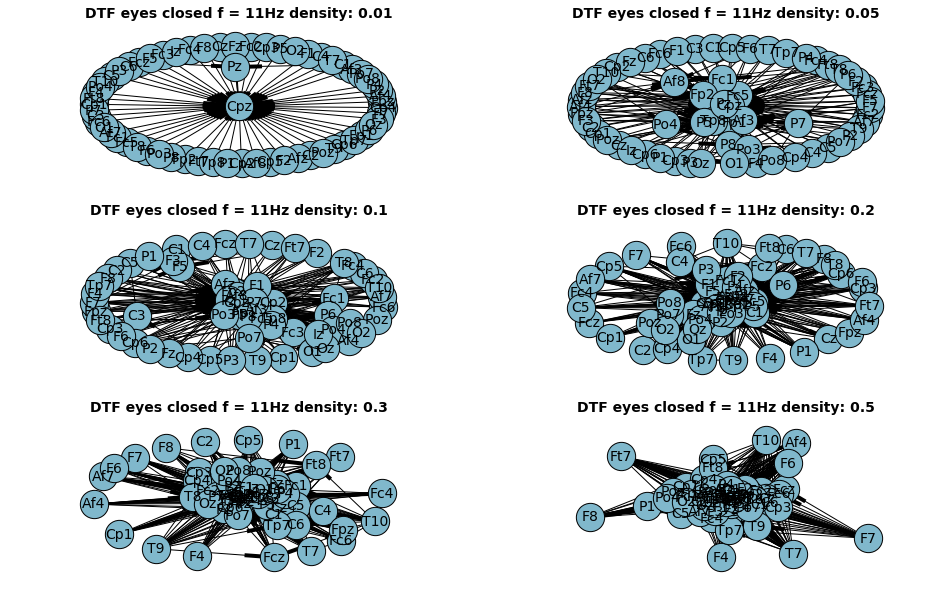

In [29]:
plt.figure(figsize=(16, 10))

d = [0.01,0.05,0.1,0.2,0.3,0.5]
idx = 0
As = []
for density in d:
    idx += 1
    plt.subplot(320+idx)
    A = adjacency_matrix(c_dtf,freq,density)
    As += [A]
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
    pos = nx.spring_layout(G)
    labels = {i: clabels[i] for i in range(len(clabels))}
    nx.draw(G, pos, node_size = 800, node_color = nc)
    nx.draw_networkx_labels(G, pos, labels, font_size=14)
    plt.title('DTF eyes closed f = '+str(freq)+'Hz density: '+str(density), fontsize=14, fontweight='bold')

plt.show()

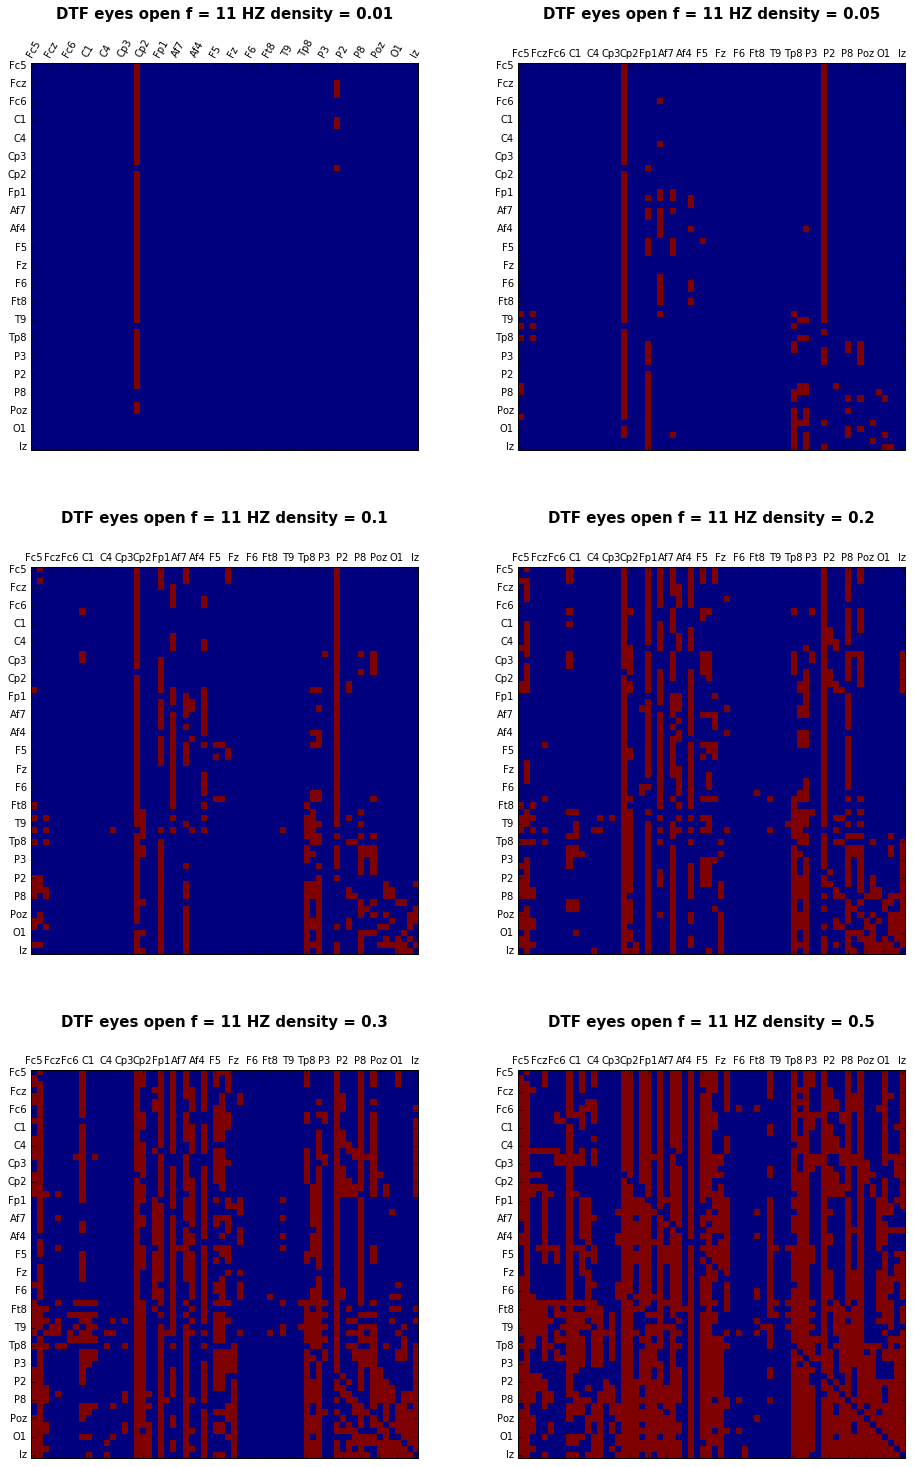

In [30]:
n = list(np.arange(0,64,3))
l = [olabels[i] for i in n]

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]
plt.subplots_adjust(hspace=.3)
f.set_figheight(25)
f.set_figwidth(16)

for i in range(6):
    axs[i].matshow(As[i])
    axs[i].set_title('DTF eyes open f = 11 HZ density = '+str(d[i]), fontsize=15, fontweight='bold', y = 1.1)
    axs[i].set_xticks(n)
    axs[i].set_yticks(n)
    axs[i].set_xticklabels(l)
    axs[i].set_yticklabels(l)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
    plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('D:/DataScience/BI/HW03/2.3-DTF(eyes_closed)_freqs.png') 
plt.show()

# 2.5. (class ‘C’) Make a topographical representation of of the networks (see example in Figure 2). Cartesian coordinates of planar representation of EEG channels are available in Table 3 (see also the file channel_locations.txt).
## (the choice of this task is advised in the case of 19-channel networks and/or density ≤ 5%).

0.182 0.0535714285714
0.182 0.0535714285714
0.232 0.0545634920635
0.207 0.0543154761905


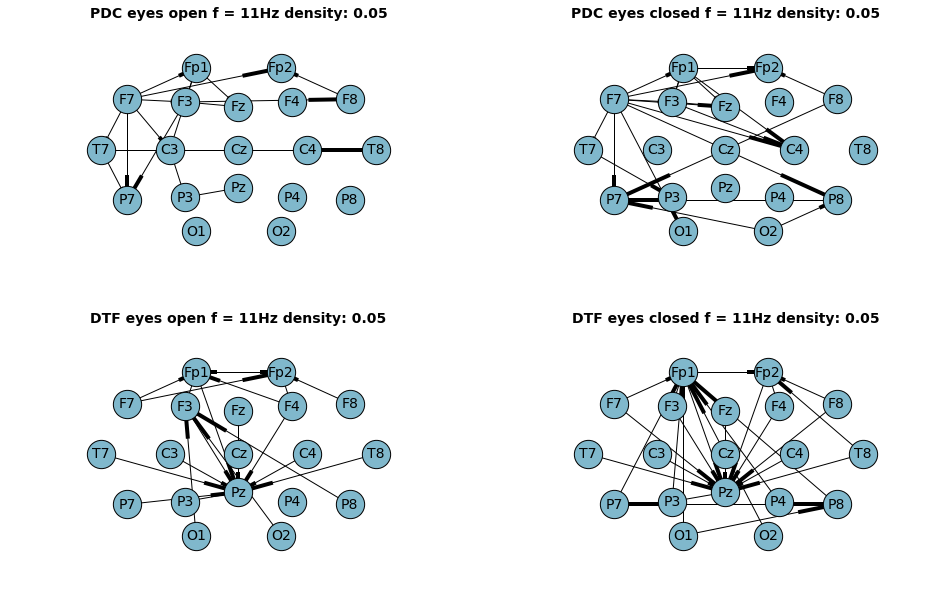

In [32]:
channel_locations = pd.read_csv('D:/DataScience/BI/HW03/channel_locations.txt', sep='\t')
ch19 = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']
pos = {n: (channel_locations['x'][n],channel_locations['y'][n]) for n in range(64) if olabels[n] in ch19}

plt.figure(figsize=(16, 10))

plt.subplot(221)
A = adjacency_matrix(o_pdc,freq,.05)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
G19 = G.subgraph([n for n in range(64) if olabels[n] in ch19])
labels19 = {i: olabels[i] for i in range(len(olabels)) if olabels[i] in ch19}
nx.draw(G19, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G19, pos, labels19, font_size=14)
plt.title('PDC eyes open f = '+str(freq)+'Hz density: 0.05', fontsize=14, fontweight='bold')
          
plt.subplot(222)
A = adjacency_matrix(c_pdc,freq,.05)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
G19 = G.subgraph([n for n in range(64) if olabels[n] in ch19])
labels19 = {i: clabels[i] for i in range(len(clabels)) if olabels[i] in ch19}
nx.draw(G19, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G19, pos, labels19, font_size=14)
plt.title('PDC eyes closed f = '+str(freq)+'Hz density: 0.05', fontsize=14, fontweight='bold')
          
plt.subplot(223)
A = adjacency_matrix(o_dtf,freq,.05)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
G19 = G.subgraph([n for n in range(64) if olabels[n] in ch19])
labels19 = {i: olabels[i] for i in range(len(olabels)) if olabels[i] in ch19}
nx.draw(G19, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G19, pos, labels19, font_size=14)
plt.title('DTF eyes open f = '+str(freq)+'Hz density: 0.05', fontsize=14, fontweight='bold')

plt.subplot(224)
A = adjacency_matrix(c_dtf,freq,.05)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
G19 = G.subgraph([n for n in range(64) if olabels[n] in ch19])
labels19 = {i: clabels[i] for i in range(len(clabels)) if olabels[i] in ch19}
nx.draw(G19, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G19, pos, labels19, font_size=14)
plt.title('DTF eyes closed f = '+str(freq)+'Hz density: 0.05', fontsize=14, fontweight='bold')

plt.savefig('D:/DataScience/BI/HW03/2.5-topographical_representation.png') 
plt.savefig('D:/DataScience/BI/HW03/2.5-topographical_representation.eps') 
plt.show()

# 2.6. (class ‘B’) Perform task 2.1 considering a second frequency value belonging to a different EEG rhythm with respect to the first choice.

In [33]:
freq2 = 20

### 19 channels, density: 5%

0.183 0.0548115079365
0.19 0.0545634920635
0.215 0.0545634920635
0.213 0.0548115079365


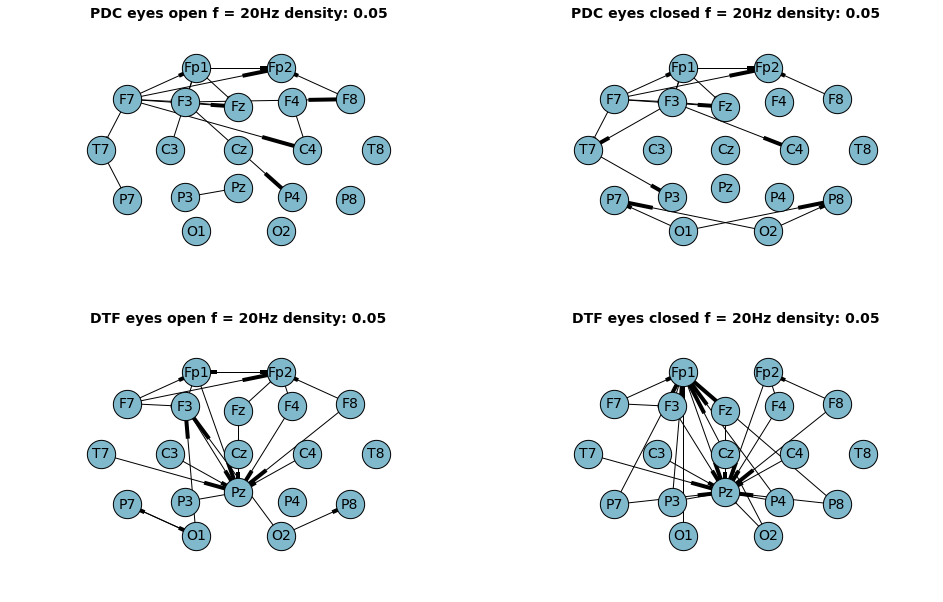

In [34]:
pos = {n: (channel_locations['x'][n],channel_locations['y'][n]) for n in range(64) if olabels[n] in ch19}

plt.figure(figsize=(16, 10))

plt.subplot(221)
A = adjacency_matrix(o_pdc,freq2,.05)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
G19 = G.subgraph([n for n in range(64) if olabels[n] in ch19])
labels19 = {i: olabels[i] for i in range(len(olabels)) if olabels[i] in ch19}
nx.draw(G19, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G19, pos, labels19, font_size=14)
plt.title('PDC eyes open f = '+str(freq2)+'Hz density: 0.05', fontsize=14, fontweight='bold')
          
plt.subplot(222)
A = adjacency_matrix(c_pdc,freq2,.05)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
G19 = G.subgraph([n for n in range(64) if olabels[n] in ch19])
labels19 = {i: clabels[i] for i in range(len(clabels)) if olabels[i] in ch19}
nx.draw(G19, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G19, pos, labels19, font_size=14)
plt.title('PDC eyes closed f = '+str(freq2)+'Hz density: 0.05', fontsize=14, fontweight='bold')
          
plt.subplot(223)
A = adjacency_matrix(o_dtf,freq2,.05)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
G19 = G.subgraph([n for n in range(64) if olabels[n] in ch19])
labels19 = {i: olabels[i] for i in range(len(olabels)) if olabels[i] in ch19}
nx.draw(G19, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G19, pos, labels19, font_size=14)
plt.title('DTF eyes open f = '+str(freq2)+'Hz density: 0.05', fontsize=14, fontweight='bold')

plt.subplot(224)
A = adjacency_matrix(c_dtf,freq2,.05)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
G19 = G.subgraph([n for n in range(64) if olabels[n] in ch19])
labels19 = {i: clabels[i] for i in range(len(clabels)) if olabels[i] in ch19}
nx.draw(G19, pos, node_size = 800, node_color = nc)
nx.draw_networkx_labels(G19, pos, labels19, font_size=14)
plt.title('DTF eyes closed f = '+str(freq2)+'Hz density: 0.05', fontsize=14, fontweight='bold')

plt.savefig('D:/DataScience/BI/HW03/2.6-20HZ19ch.png')
plt.show()

### 64 channels, density: 20%

0.12 0.203621031746
0.121 0.204365079365
0.117 0.203373015873
0.121 0.201636904762


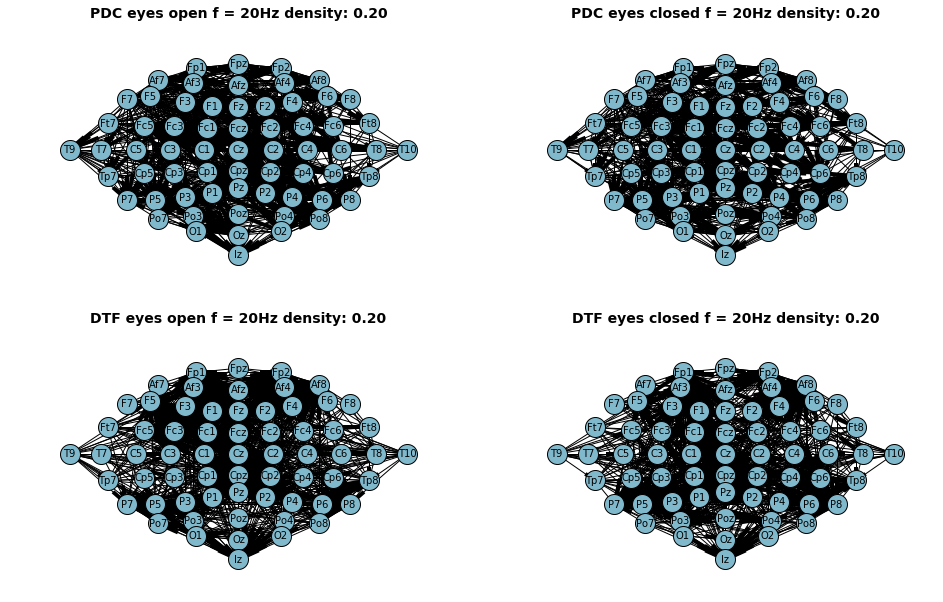

In [35]:
pos = {n: (channel_locations['x'][n],channel_locations['y'][n]) for n in range(64)}
As = []
plt.figure(figsize=(16, 10))

plt.subplot(221)
plt.xlim(-.6,.6)
A = adjacency_matrix(o_pdc,freq2,.20)
As += [A]
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(G, pos, node_size = 400, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('PDC eyes open f = '+str(freq2)+'Hz density: 0.20', fontsize=14, fontweight='bold')
          
plt.subplot(222)
plt.xlim(-.6,.6)
A = adjacency_matrix(c_pdc,freq2,.20)
As += [A]
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
labels = {i: clabels[i] for i in range(len(clabels))}
nx.draw(G, pos, node_size = 400, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('PDC eyes closed f = '+str(freq2)+'Hz density: 0.20', fontsize=14, fontweight='bold')
          
plt.subplot(223)
plt.xlim(-.6,.6)
A = adjacency_matrix(o_dtf,freq2,.20)
As += [A]
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(G, pos, node_size = 400, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('DTF eyes open f = '+str(freq2)+'Hz density: 0.20', fontsize=14, fontweight='bold')

plt.subplot(224)
plt.xlim(-.6,.6)
A = adjacency_matrix(c_dtf,freq2,.20)
As += [A]
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
labels = {i: clabels[i] for i in range(len(clabels))}
nx.draw(G, pos, node_size = 400, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('DTF eyes closed f = '+str(freq2)+'Hz density: 0.20', fontsize=14, fontweight='bold')

plt.show()

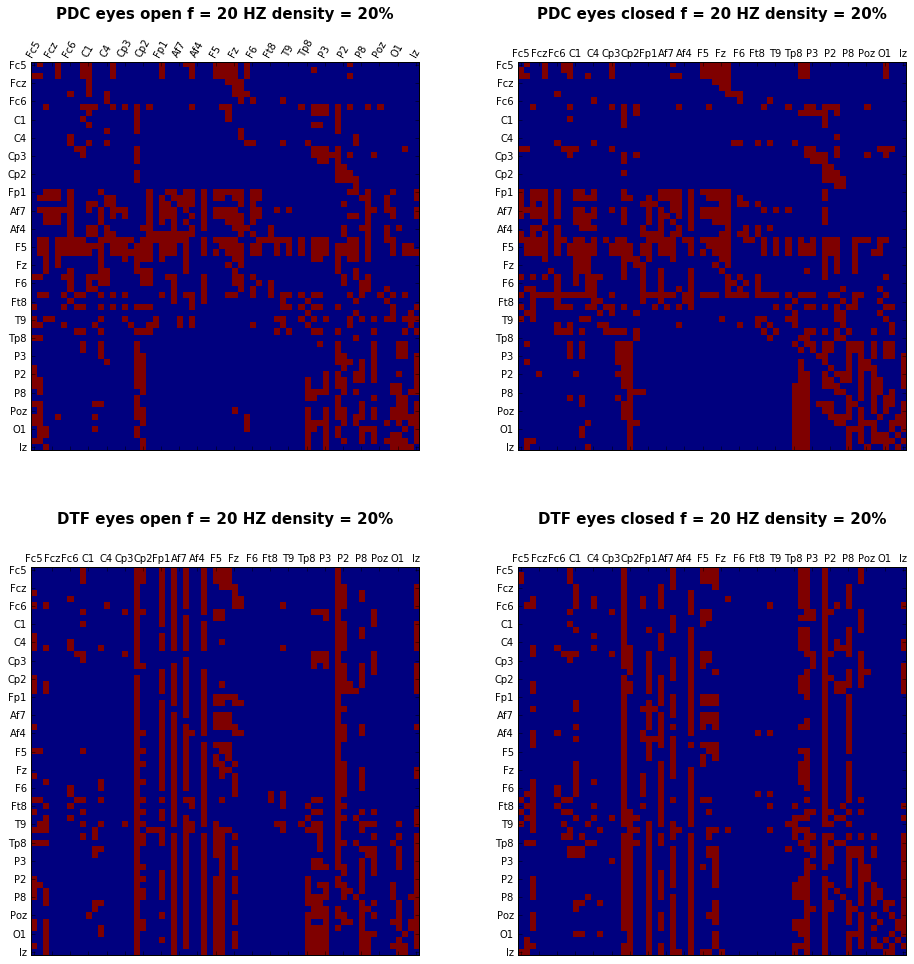

In [37]:
n = list(np.arange(0,64,3))
l = [olabels[i] for i in n]
t = ['PDC eyes open','PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axs = [ax1,ax2,ax3,ax4]
plt.subplots_adjust(hspace=.3)
f.set_figheight(16)
f.set_figwidth(16)

for i in range(4):
    axs[i].matshow(As[i])
    axs[i].set_title(t[i]+' f = 20 HZ density = 20%', fontsize=15, fontweight='bold', y = 1.1)
    axs[i].set_xticks(n)
    axs[i].set_yticks(n)
    axs[i].set_xticklabels(l)
    axs[i].set_yticklabels(l)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
    plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('D:/DataScience/BI/HW03/2.6-PDC_DTF20HZ.png') 
plt.show()

# Motif analysis files

In [38]:
file = open('D:/DataScience/BI/HW03/4-Go_pdc.txt','w') 
for i in G_pdc_o.edges(): file.write(str(i[0])+' '+str(i[1])+' ' + '1'+ '\n')
file.close()
file = open('D:/DataScience/BI/HW03/4-Gc_pdc.txt','w') 
for i in G_pdc_c.edges(): file.write(str(i[0])+' '+str(i[1])+' ' + '1'+ '\n')
file.close()
file = open('D:/DataScience/BI/HW03/4-Go_dtf.txt','w') 
for i in G_dtf_o.edges(): file.write(str(i[0])+' '+str(i[1])+' ' + '1'+ '\n')
file.close()
file = open('D:/DataScience/BI/HW03/4-Gc_dtf.txt','w') 
for i in G_dtf_c.edges(): file.write(str(i[0])+' '+str(i[1])+' ' + '1'+ '\n')
file.close()